# Machine Learning for Public Policy - Homework 3

In [1]:
### Héctor Salvador López
### Code for the pipeline was significantly inspired on:
### /rayidghani/magicloops/blob/master/magicloops.py
### /BridgitD/Machine-Learning-Pipeline/blob/master/pipeline.py
### /danilito19/CAPP-ML-dla/blob/master/pa3/workflow.py
### /ladyson/ml-for-public-policy/blob/master/PA3/pipeline.py
### /demunger/CAPP30254/blob/master/HW3/hw3.py
### /aldengolab/ML-basics/blob/master/pipeline/model.py

In [2]:
%matplotlib inline
import math
import pandas as pd
from pipeline import reading, explore, preprocess, features, classify
from sklearn.cross_validation import train_test_split

In [3]:
# We define filename, features, and label for this dataset
filename = 'pipeline/data/cs-training.csv'
fts = ['RevolvingUtilizationOfUnsecuredLines', 
            'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 
            'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 
            'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 
            'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']
label = 'SeriousDlqin2yrs'

In [4]:
# read dataset
df = reading.read(filename)

In [5]:
# divide dataset to train and test
xtrain, xtest, ytrain, ytest = train_test_split(df[fts], df[label])
train = pd.concat([ytrain, xtrain], axis = 1)
test = pd.concat([ytest, xtest], axis = 1)
df = train

In [6]:
# generate statistics and generic exploration histograms
explore.basics(df)

Observations:
112500

11 features:
    1) SeriousDlqin2yrs
    2) RevolvingUtilizationOfUnsecuredLines
    3) age
    4) NumberOfTime30-59DaysPastDueNotWorse
    5) DebtRatio
    6) MonthlyIncome
    7) NumberOfOpenCreditLinesAndLoans
    8) NumberOfTimes90DaysLate
    9) NumberRealEstateLoansOrLines
    10) NumberOfTime60-89DaysPastDueNotWorse
    11) NumberOfDependents


Sample observations:
        SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
104305                 0                              0.036359   37   
141464                 0                              0.721759   58   
55164                  0                              0.757706   46   
46738                  0                              0.219536   40   
38236                  0                              0.000000   38   

        NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  MonthlyIncome  \
104305                                     0     0.261781         5389.0   
141464                  

In [7]:
explore.desc_statistics(df)

Descriptive statistics:
              SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count            112500.000000                         112500.000000   
mean                  0.066791                              5.873784   
std                   0.249661                            260.692098   
min                   0.000000                              0.000000   
25%                   0.000000                              0.030023   
50%                   0.000000                              0.154193   
75%                   0.000000                              0.556885   
max                   1.000000                          50708.000000   
median                0.000000                              0.154193   
skew                  3.470439                            104.903669   
kurtosis             10.044123                          15805.636945   
missing_vals          0.000000                              0.000000   

                        age  NumberOfTi

In [8]:
explore.corr(df)

Correlation matrix:
                                      SeriousDlqin2yrs  \
SeriousDlqin2yrs                              1.000000   
RevolvingUtilizationOfUnsecuredLines         -0.002931   
age                                          -0.115787   
NumberOfTime30-59DaysPastDueNotWorse          0.118711   
DebtRatio                                    -0.008133   
MonthlyIncome                                -0.023181   
NumberOfOpenCreditLinesAndLoans              -0.028400   
NumberOfTimes90DaysLate                       0.111007   
NumberRealEstateLoansOrLines                 -0.005712   
NumberOfTime60-89DaysPastDueNotWorse          0.094859   
NumberOfDependents                            0.047958   

                                      RevolvingUtilizationOfUnsecuredLines  \
SeriousDlqin2yrs                                                 -0.002931   
RevolvingUtilizationOfUnsecuredLines                              1.000000   
age                                              

In [9]:
explore.plots(df)

Check the current folder for default histograms of these features.


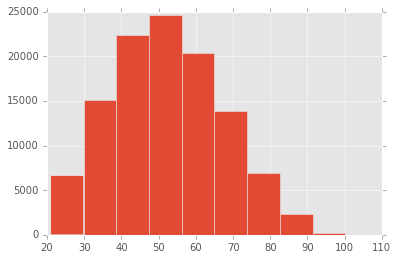

In [57]:
# dive deeper into histograms
df.age.hist()

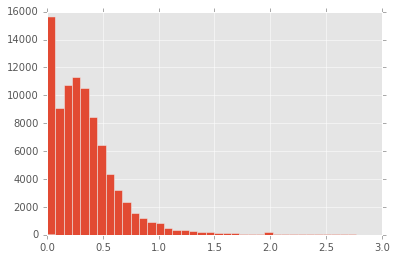

In [11]:
# A lot of observations below 3
df[df.DebtRatio < 3].DebtRatio.hist(bins=40)

In [72]:
# A lot of observation are exact integers. Yet most observations are 
pd.value_counts(df.DebtRatio).sort_values(ascending=False).head(15)

0.0     3086
1.0      178
4.0      128
2.0      126
3.0      116
5.0      104
13.0      92
9.0       91
6.0       89
10.0      87
11.0      85
12.0      82
7.0       79
8.0       79
21.0      74
Name: DebtRatio, dtype: int64

In [73]:
pd.qcut(df.DebtRatio, [0,0.2,0.4,0.6,0.8,1])

104305    (0.133, 0.287]
141464        (0.467, 4]
55164         (0.467, 4]
46738         [0, 0.133]
38236        (4, 329664]
3055          (0.467, 4]
129716    (0.133, 0.287]
145062        [0, 0.133]
41305         [0, 0.133]
115644    (0.287, 0.467]
45131     (0.133, 0.287]
107839    (0.287, 0.467]
148759       (4, 329664]
98360        (4, 329664]
15458         (0.467, 4]
116118        [0, 0.133]
72026         (0.467, 4]
43396         (0.467, 4]
51468         (0.467, 4]
66167         [0, 0.133]
139348    (0.287, 0.467]
61587     (0.133, 0.287]
76250        (4, 329664]
48943     (0.133, 0.287]
83962        (4, 329664]
52398         [0, 0.133]
86550     (0.287, 0.467]
34876     (0.287, 0.467]
35985        (4, 329664]
149366    (0.133, 0.287]
               ...      
137249        (0.467, 4]
85688        (4, 329664]
85778     (0.133, 0.287]
34548     (0.133, 0.287]
124507    (0.133, 0.287]
129576       (4, 329664]
84466     (0.133, 0.287]
7070          (0.467, 4]
126669        [0, 0.133]


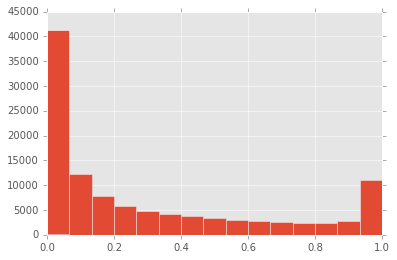

In [63]:
# Many zeros and ones (15,696), but also a lot of outliers. Total balance / sum of credit limits can't be greater than
# 1, theorically...
df[df.RevolvingUtilizationOfUnsecuredLines < 1].RevolvingUtilizationOfUnsecuredLines.hist(bins=15)

In [53]:
pd.value_counts(df.RevolvingUtilizationOfUnsecuredLines).sort_values(ascending=False).head(5)

0.000000    8105
1.000000    7578
1.000000      13
0.796407       5
0.954092       5
Name: RevolvingUtilizationOfUnsecuredLines, dtype: int64

In [58]:
# These ones don't make sense at all.
pd.value_counts(df.RevolvingUtilizationOfUnsecuredLines).sort_index(ascending=False).head(5)

50708.0    1
29110.0    1
22198.0    1
22000.0    1
18300.0    1
Name: RevolvingUtilizationOfUnsecuredLines, dtype: int64

In [59]:
# The 98 and 96 values are suspicious. How can someone be 98 times 30-59 days past due in two years?? Same goes for
# 60-89, and over 90 days.
pd.value_counts(df['NumberOfTime30-59DaysPastDueNotWorse'])

0     94578
1     11977
2      3469
3      1300
4       570
5       245
98      187
6        98
7        36
8        19
9        11
96        5
10        3
12        1
11        1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [60]:
pd.value_counts(df['NumberOfTime60-89DaysPastDueNotWorse'])

0     106859
1       4267
2        821
3        237
98       187
4         76
5         27
6         12
7          6
96         5
11         1
9          1
8          1
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [61]:
pd.value_counts(df.NumberOfTimes90DaysLate)

0     106213
1       3956
2       1185
3        493
4        230
98       187
5         90
6         62
7         28
8         18
9         16
10         7
96         5
11         4
15         2
12         1
13         1
14         1
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [23]:
# impute null values with mean value and transform income to log(income)
preprocess.impute_csv(df)
preprocess.transform_feature(df, 'MonthlyIncome', lambda x: math.log(x + 1))
fts.append(df.keys()[-1])

0) SeriousDlqin2yrs has null values: False.
1) RevolvingUtilizationOfUnsecuredLines has null values: False.
2) age has null values: False.
3) NumberOfTime30-59DaysPastDueNotWorse has null values: False.
4) DebtRatio has null values: False.
5) MonthlyIncome has null values: True.
  Filling nulls with mean.
6) NumberOfOpenCreditLinesAndLoans has null values: False.
7) NumberOfTimes90DaysLate has null values: False.
8) NumberRealEstateLoansOrLines has null values: False.
9) NumberOfTime60-89DaysPastDueNotWorse has null values: False.
10) NumberOfDependents has null values: True.
  Filling nulls with mean.


In [24]:
# create a feature of income quartile
features.binning(df, 'f(MonthlyIncome)', 'quantiles', [0, 0.25, 0.5, 0.75, 1])
fts.append(df.keys()[-1])

In [18]:
#models = ['LR', 'KNN', 'DT', 'SVM', 'RF', 'GB']
models = ['LR', 'DT', 'RF']

In [19]:
results, best_models = classify.classify(df[fts], df[label], models, 3, 0.05)

LR
Finished running LR
Best model was: LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False), with auc = 0.6314434558249972.

DT
Finished running DT
Best model was: DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=100,
            max_features='log2', max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'), with auc = 0.761380195609501.

RF
Finished running RF
Best model was: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='log2', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
        

In [20]:
results


,time,avg_auc,params
LR,1.39334,0.631443,"{'C': 10, 'penalty': 'l2'}"
DT,0.123689,0.76138,"{'criterion': 'entropy', 'max_features': 'log2..."
RF,0.832267,0.779374,"{'max_features': 'log2', 'min_samples_split': ..."


In [21]:
best_models


{'DT': DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=100,
             max_features='log2', max_leaf_nodes=None, min_samples_leaf=1,
             min_samples_split=10, min_weight_fraction_leaf=0.0,
             presort=False, random_state=None, splitter='best'),
 'LR': LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'RF': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=10, max_features='log2', max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False)}

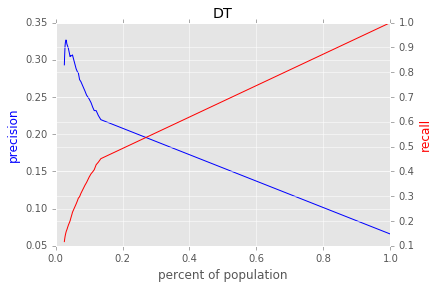

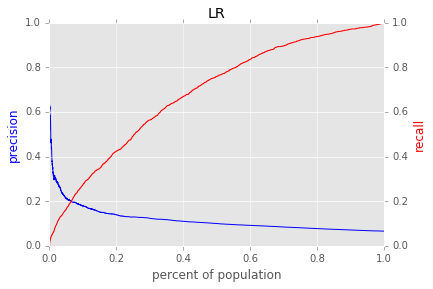

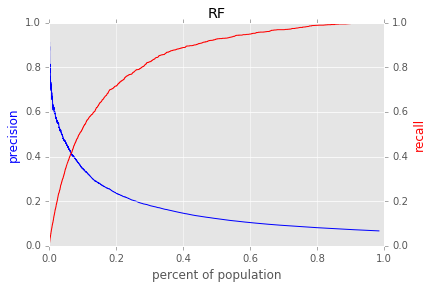

In [22]:
classify.gen_precision_recall_plots(df[fts], df[label], best_models)
